# Learning a *Not* Function

In [1]:
# import libraries
import tensorflow as tf
import numpy as np

# libraries for 3d plotting
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Goals
Our goal is to learn a $not$ function using a neural network. We are given only positive examples of the inputs and outputs of the function:

|         |input (x)|output (y)|
|---------|:-------:|:--------:|
|example 1|    0    |     1    |
|example 2|    1    |     0    |

### Approach
We'll approximate the function with a new function ($f$) with extra parameters $W$ and $b$ : $f(x, W, b) = sigmoid(x * W + b)$. We want $f$ to be a good aproximation, Which means that its output on the example data $x$ is as close to the correct outputs $y$ as possible. To achieve that we formaly define what it means to be a good approximation using a _loss_ function: $loss(x, y, W, b) = (f(x, W, b) - y)^2$. Now our goal is to find values for the parameters $W$ and $b$ that minimize the joint loss on our exmaple data points:

$$W, b = \underset{W,b}{argmin}(\dfrac{loss(x_1, y_1, W, b) + loss(x_2, y_2, W, b)}{2})$$

To do that we can use _gradient descent_.

In [2]:
activation_fn = tf.sigmoid
# activation_fn = tf.nn.relu
# activation_fn = tf.nn.elu

training_step_count = 20
learning_rate = 50.

testGraph = tf.Graph()
with testGraph.as_default():

    # Make 2 data points in NumPy.
    # two input values: 0 and 1
    x_data = tf.constant(np.float32([[0,1]]), name='x_data')
    # two corresponding outptu values: 1 and 0
    y_data = tf.constant(np.float32([1,0]), name='y_data')

    # Construct a linear model.
    # for this example we set the inital values to 3
    b = tf.Variable(np.float32([3]), name='b')
    W = tf.Variable(np.float32([[3]]), name='W')

    # define the aproximation function f(x, W, b)
    # note that in this case we calculate the output not
    # on a single value, but on both input values
    # the result thus is also both output values at the same time
    f = activation_fn(tf.matmul(W, x_data) + b, name='f')

    # define the loss function (squared errors)
    # loss(x, y, W, b) = mean(f(x, W, b) - y)^2
    loss = tf.reduce_mean(tf.square(f - y_data), name='mean_loss')

    # Minimize the loss function.
    # find the values for W and b that minimize the loss (argmin(W,b, loss))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)

    # define summary operatators to see monitor training progress
    tf.scalar_summary(loss.op.name, loss)
    merged_summary_op = tf.merge_all_summaries()

    # For initializing the tensor flow variables.
    init = tf.initialize_all_variables()

weight_history = {
    b: [],
    W: [],
    loss: []
}
    
# Launch the graph
with tf.Session(graph=testGraph) as sess:
    sess.run(init)

    # create summary writer for writing summaries that can be view with tensorboard
    summary_writer = tf.train.SummaryWriter('./tf_log', graph_def=sess.graph_def, flush_secs=0.1)


    # print parameter values and loss before training
    print 'Before training:'
    print 'W: %f, b: %f, loss: %f' % tuple(sess.run([W, b, loss]))

    # Training
    print 'Training:'
    for step in xrange(0, training_step_count):
       
        # collect updates for 3d plotting
        ([[W_value]], [b_value], loss_value) = sess.run([W, b, loss]) 
        weight_history[b].append(b_value)
        weight_history[W].append(W_value)
        weight_history[loss].append(loss_value)

        # perform one training step
        sess.run(train)
        
        # print progress every step
        if step % 1 == 0:
            print 'step: %2s, W: % f,  b: %f,  loss: %f' % (step, W_value, b_value, loss_value)

            # get summary values
            summary_str = sess.run(merged_summary_op)
            # add sumamary to disk
            summary_writer.add_summary(summary_str,step)

Before training:
W: 3.000000, b: 3.000000, loss: 0.498655
Training:
step:  0, W:  2.876982,  b: 2.984109,  loss: 0.498323
step:  1, W:  2.735785,  b: 2.953247,  loss: 0.497863
step:  2, W:  2.568343,  b: 2.902635,  loss: 0.497173
step:  3, W:  2.360620,  b: 2.823195,  loss: 0.496013
step:  4, W:  2.084955,  b: 2.695977,  loss: 0.493714
step:  5, W:  1.675927,  b: 2.474104,  loss: 0.487619
step:  6, W:  0.923862,  b: 2.000405,  loss: 0.457431
step:  7, W: -1.371341,  b: 0.330563,  loss: 0.121466
step:  8, W: -3.888409,  b: 2.899581,  loss: 0.038121
step:  9, W: -6.567644,  b: 0.349352,  loss: 0.085509
step: 10, W: -6.567842,  b: 5.363831,  loss: 0.026637
step: 11, W: -8.615987,  b: 3.316767,  loss: 0.000625
step: 12, W: -8.617216,  b: 3.374645,  loss: 0.000562
step: 13, W: -8.618591,  b: 3.426228,  loss: 0.000511
step: 14, W: -8.620111,  b: 3.472716,  loss: 0.000470
step: 15, W: -8.621772,  b: 3.514987,  loss: 0.000435
step: 16, W: -8.623572,  b: 3.553710,  loss: 0.000407
step: 17, W: -

# 3D plotting

<IPython.core.display.Javascript object>


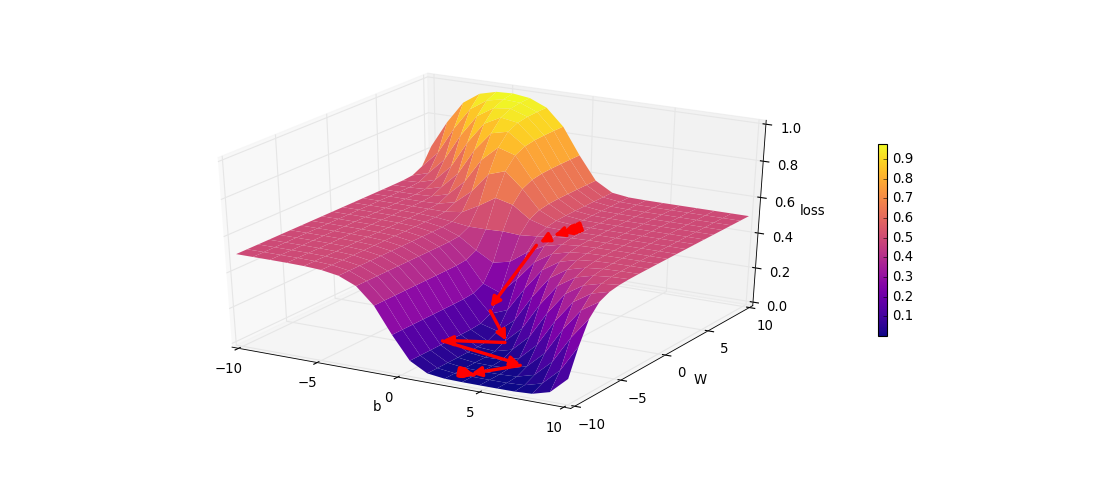

In [3]:
b_min, b_max = (-10, 10)
W_min, W_max = (-15, 10)
b_point_count, W_point_count = (b_max - b_min, W_max - W_min)
b_grid, W_grid = np.meshgrid(np.linspace(b_min, b_max, b_point_count),
                              np.linspace(W_min, W_max, W_point_count))

loss_grid = np.zeros((W_point_count, b_point_count))

with tf.Session(graph=testGraph) as sess:
    sess.run(init)
    for b_index in xrange(0, b_point_count):
        for W_index in xrange(0, W_point_count):
            b_value = b_grid[W_index][b_index]
            W_value = W_grid[W_index][b_index]
            loss_value = sess.run(loss,
                                  feed_dict={b: [b_value],
                                             W: [[W_value]]})
            loss_grid[W_index][b_index] = loss_value


fig = plt.figure(figsize=(14,6))


# surface_plot with color grading and color bar
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.gca(projection='3d')

ax.set_xlabel('b')
ax.set_ylabel('W')
ax.set_zlabel('loss')

p = ax.plot_surface(b_grid, W_grid, loss_grid,
                    rstride=1, cstride=1, cmap=plt.get_cmap('plasma'),
                    linewidth=0, antialiased=True)
# line plot without arrows http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots
# ax.plot(weight_history[b], weight_history[W], weight_history[loss])
cb = fig.colorbar(p, shrink=0.5)


# 3D arrow drawing taken from http://stackoverflow.com/a/22867877
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# show update progress
for i in xrange(1, training_step_count):
    a = Arrow3D(weight_history[b][i-1:i+1],
                weight_history[W][i-1:i+1],
                weight_history[loss][i-1:i+1],
                mutation_scale=20,
                lw=3,
                arrowstyle="-|>",
                color="r")
    ax.add_artist(a)

plt.show()

# Tensorboard
Need to restart ipython kernel to flush event summaries


## launch tensorboard
    tensorboard --logdir tf_log
    
open [192.168.99.100:6006](http://192.168.99.100:6006) in Chrome

## clear logs
    rm -rfd ./tf_log